# K-means  
ref: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)

centroids = kmeans.cluster_centers_

print('centroids: {}'.format(centroids))
print('prediction on each data: {}'.format(labels))

accuracy = accuracy_score(y, labels)
num_correct_samples = accuracy_score(y, labels, normalize=False)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))

centroids: [[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]
prediction on each data: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
number of correct sample: 134
accuracy: 0.8933333333333333


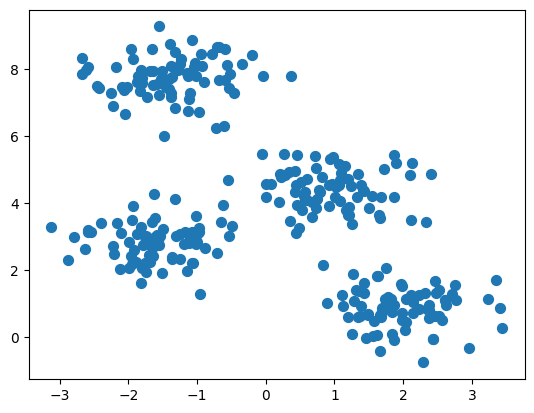

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

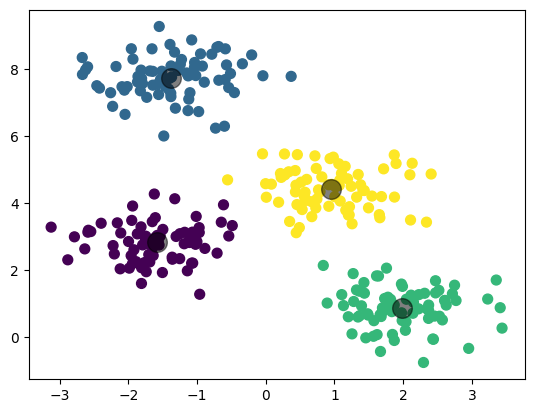

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## silhouette score   
WSS(Within Cluster Sum of Squares)/BSS(Between Cluster Sum of Squares)  
![alt text](./images/silhouette_score.PNG)
ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

In [20]:
from sklearn import cluster, datasets, metrics

# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

# KMeans 演算法
kmeans_fit = cluster.KMeans(n_clusters = 3).fit(iris_X)
cluster_labels = kmeans_fit.labels_

# 印出績效
silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
print(silhouette_avg)

0.5528190123564095


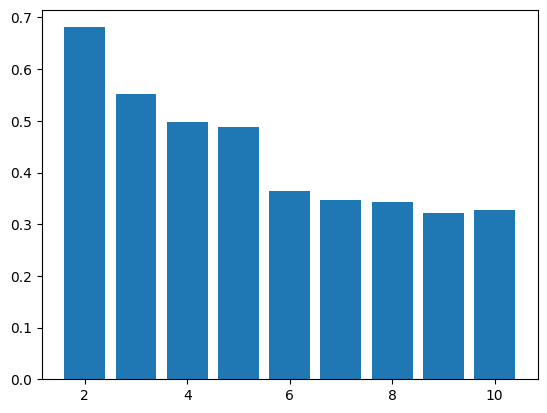

[0.6810461692117462, 0.5528190123564095, 0.49721766487109753, 0.48874888709310566, 0.36483400396700255, 0.3470976888619347, 0.3434095411983833, 0.3221847041233063, 0.3276339944588769]


In [21]:
from sklearn import cluster, datasets, metrics
import matplotlib.pyplot as plt

# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

# 迴圈
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(iris_X)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

In [24]:
import numpy as np
import cv2
from sklearn.cluster import KMeans

image = cv2.imread('test_image.jpg')

print(image.shape)
(h1, w1) = image.shape[:2]


# 像數座標轉換
image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
# ref: https://cg2010studio.com/2011/11/13/lab-%E8%89%B2%E5%BD%A9%E7%A9%BA%E9%96%93-lab-color-space/

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 10)

labels = clt.fit_predict(image)

print('cluster is :\n{}'.format(clt.cluster_centers_))
quant = clt.cluster_centers_.astype("uint8")[labels]
print('quant is:\n{}'.format(quant))

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('generated.jpg', quant)
cv2.waitKey(0)
cv2.destroyAllWindows()

(800, 1276, 3)
cluster is :
[[107.17052173 114.75618799 157.17223442]
 [212.70148534 126.66311623 118.91562462]
 [ 58.20918354 120.20113448 143.43541059]
 [ 30.84802082 129.7671004  136.05445829]
 [127.74085385 114.71632734 160.79681187]
 [169.55975522 128.43493772 101.1923365 ]
 [151.91641609 117.16982096 163.44169959]
 [ 84.2305595  116.7791845  150.47727704]
 [197.40664025 125.35977778 111.87926988]
 [144.9344272  132.21242794  91.58317102]]
quant is:
[[212 126 118]
 [212 126 118]
 [212 126 118]
 ...
 [151 117 163]
 [151 117 163]
 [151 117 163]]


In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

data = pd.read_csv('C:/sunny.workstation/Sunny.Python/資策會_ML_20221128/hands-on_part6/practice/dataset/xclara.csv')

print(data.shape)

f1 = data['V1'].values
f2 = data["V2"].values

X = np.array(list(zip(f1,f2)))

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

kmeans = KMeans(n_clusters=10)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)

centroids = kmeans.cluster_centers_

# print('centroids: {}'.format(centroids))
print('prediction: {}'.format(labels))

labels = kmeans.predict(np.array([[12.0,14.0]]))
print('prediction on data point (12.0, 14.0): {}'.format(labels))

labels


(3000, 2)
prediction: [8 1 8 ... 9 7 3]
prediction on data point (12.0, 14.0): [2]


array([2])

# DBSCAN  
ref: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [3]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import datasets
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

db = DBSCAN(eps=0.8, min_samples=3).fit(X)
labels = db.labels_

#  Note that -1 are noisy points
print('cluster on X {}'.format(labels))

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print('number of clusters: {}'.format(n_clusters))

cluster on X [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
number of clusters: 2


# EM(GMM)  
ref: http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

In [9]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import mixture
import pandas as pd
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

gmm = mixture.GaussianMixture(n_components=3).fit(X)
X_pred = gmm.predict(X)

print(X_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


X_train shape: (200, 2)
________________________________________



[[2.61755903 2.49389168]
 [1.7395701  3.10180942]
 [3.31414238 3.10472391]
 [1.24430187 1.93071636]
 [3.17727043 3.66255088]]



means:
[[3.0363831  3.09828041]
 [1.60629419 1.3470999 ]]
covariances:
[[[ 0.8465178   0.38644336]
  [ 0.38644336  0.73395863]]

 [[ 0.75275611 -0.5054196 ]
  [-0.5054196   0.74286061]]]


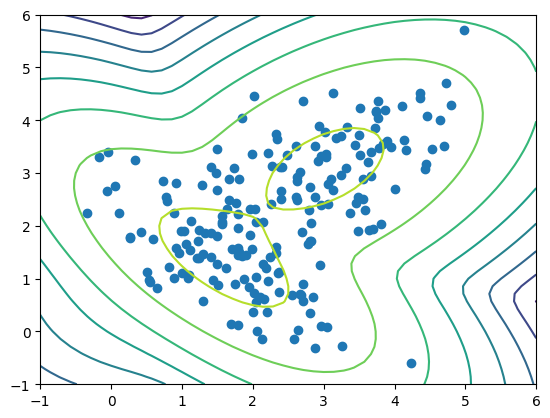

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

X_train = np.load('data.npy')

print('X_train shape: {}'.format(X_train.shape))
print('________________________________________')
print('\n\n')
print(X_train[:5,:])
print('\n\n')

gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)

print('means:\n{}'.format(gmm.means_))
print('covariances:\n{}'.format(gmm.covariances_))

X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))

plt.contour(X, Y, Z)
plt.scatter(X_train[:, 0], X_train[:, 1])

plt.show()